<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 >Week 22 Lab</h1>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exercise 1

We'd like to analyze the `SNAP_history_1969_2019.csv` dataset, however it's missing some data. Find the missing values. Fix incorrect entries as well.

Some helpful formulas:

$ \texttt{Total Costs} = \texttt{Total Benefits} + \texttt{Other Costs} $

$ \texttt{Total Benefits} = \texttt{Total Costs} - \texttt{Other Costs} $

$ \texttt{Other Costs} = \texttt{Total Costs} - \texttt{Total Benefits} $

$ \texttt{Average Participation} = \frac{\texttt{Total Benefits}}{\texttt{Average Benefits Per Person}}$

$ \texttt{Average Benefits Per Person} = \frac{\texttt{Total Benefits}}{\texttt{Average Participation}}$

$ \texttt{Total Benefits} = \texttt{Average Benefits Per Person} * \texttt{Average Participation}$

Note: `Average Participation` is in the thousands and all costs  are in the millions.

Hint: Think about how we can filter for specific columns that are null and apply a fix for those missing values.


In [2]:
# calling it s_df to not confuse it with the others 
# and because `snap_df` is too much to constantly write
s_df = pd.read_csv('../datasets/SNAP_history_1969_2019.csv')
s_df

,Fiscal Year,Average Participation,Average Benefit Per Person,Total Benefits(M),Other Costs,Total Costs(M)
0,1969,2878.0,6.63,228.80,21.70,250.50
1,1970,4340.0,10.55,549.70,27.20,576.90
2,1971,9368.0,13.55,1522.70,53.20,1575.90
3,1972,NaN,13.48,1797.30,69.40,NaN
4,1973,12166.0,14.60,2131.40,76.00,2207.40
5,1974,12862.0,17.61,2718.30,119.20,2837.50
6,1975,17064.0,21.40,4385.50,233.20,4618.70
7,1976,18549.0,NaN,5326.50,359.00,5685.50
8,1977,17077.0,24.71,5067.00,394.00,5461.00
9,1978,16001.0,26.77,5139.20,380.50,5519.70


In [3]:
s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fiscal Year                 50 non-null     object 
 1   Average Participation       48 non-null     float64
 2   Average Benefit Per Person  48 non-null     float64
 3   Total Benefits(M)           50 non-null     float64
 4   Other Costs                 51 non-null     float64
 5   Total Costs(M)              48 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


In [4]:
s_df[s_df.isnull().any(axis=1)]

,Fiscal Year,Average Participation,Average Benefit Per Person,Total Benefits(M),Other Costs,Total Costs(M)
3,1972,NaN,13.48,1797.30,69.40,NaN
7,1976,18549.0,NaN,5326.50,359.00,5685.50
16,1985,19899.0,NaN,10743.60,959.60,11703.20
19,1988,18645.0,49.83,11149.10,1167.70,NaN
22,1991,NaN,63.78,17315.77,1431.50,18747.27
24,NaN,26987.0,67.95,22006.03,1646.94,23652.97
33,2002,19096.0,79.67,NaN,2380.82,20637.02
36,2005,25628.0,92.89,28567.88,2504.13,NaN
38,2007,26316.0,NaN,30373.27,2800.25,33173.52
45,2014,NaN,125.01,69998.84,4061.49,74060.33


In [5]:
# 𝚃𝚘𝚝𝚊𝚕 𝙲𝚘𝚜𝚝𝚜=𝚃𝚘𝚝𝚊𝚕 𝙱𝚎𝚗𝚎𝚏𝚒𝚝𝚜+𝙾𝚝𝚑𝚎𝚛 𝙲𝚘𝚜𝚝𝚜
s_df["Total Costs(M)"] = s_df['Total Benefits(M)'].fillna(0) + s_df['Other Costs'].fillna(0)
s_df

,Fiscal Year,Average Participation,Average Benefit Per Person,Total Benefits(M),Other Costs,Total Costs(M)
0,1969,2878.0,6.63,228.80,21.70,250.50
1,1970,4340.0,10.55,549.70,27.20,576.90
2,1971,9368.0,13.55,1522.70,53.20,1575.90
3,1972,NaN,13.48,1797.30,69.40,1866.70
4,1973,12166.0,14.60,2131.40,76.00,2207.40
5,1974,12862.0,17.61,2718.30,119.20,2837.50
6,1975,17064.0,21.40,4385.50,233.20,4618.70
7,1976,18549.0,NaN,5326.50,359.00,5685.50
8,1977,17077.0,24.71,5067.00,394.00,5461.00
9,1978,16001.0,26.77,5139.20,380.50,5519.70


In [6]:
# 𝚃𝚘𝚝𝚊𝚕 𝙱𝚎𝚗𝚎𝚏𝚒𝚝𝚜=𝚃𝚘𝚝𝚊𝚕 𝙲𝚘𝚜𝚝𝚜−𝙾𝚝𝚑𝚎𝚛 𝙲𝚘𝚜𝚝𝚜
s_df["Total Benefits(M)"] = s_df['Total Costs(M)'].fillna(0) - s_df['Other Costs'].fillna(0)
s_df

,Fiscal Year,Average Participation,Average Benefit Per Person,Total Benefits(M),Other Costs,Total Costs(M)
0,1969,2878.0,6.63,228.80,21.70,250.50
1,1970,4340.0,10.55,549.70,27.20,576.90
2,1971,9368.0,13.55,1522.70,53.20,1575.90
3,1972,NaN,13.48,1797.30,69.40,1866.70
4,1973,12166.0,14.60,2131.40,76.00,2207.40
5,1974,12862.0,17.61,2718.30,119.20,2837.50
6,1975,17064.0,21.40,4385.50,233.20,4618.70
7,1976,18549.0,NaN,5326.50,359.00,5685.50
8,1977,17077.0,24.71,5067.00,394.00,5461.00
9,1978,16001.0,26.77,5139.20,380.50,5519.70


In [7]:
# 𝙰𝚟𝚎𝚛𝚊𝚐𝚎 𝙿𝚊𝚛𝚝𝚒𝚌𝚒𝚙𝚊𝚝𝚒𝚘𝚗 = 𝚃𝚘𝚝𝚊𝚕 𝙱𝚎𝚗𝚎𝚏𝚒𝚝𝚜/𝙰𝚟𝚎𝚛𝚊𝚐𝚎 𝙱𝚎𝚗𝚎𝚏𝚒𝚝𝚜 𝙿𝚎𝚛 𝙿𝚎𝚛𝚜𝚘𝚗
s_df["Average Participation"] = s_df["Total Benefits(M)"].fillna(value=0,downcast="int64") / s_df["Average Benefit Per Person"].fillna(value=0,downcast="int64")
s_df

,Fiscal Year,Average Participation,Average Benefit Per Person,Total Benefits(M),Other Costs,Total Costs(M)
0,1969,34.509804,6.63,228.80,21.70,250.50
1,1970,52.104265,10.55,549.70,27.20,576.90
2,1971,112.376384,13.55,1522.70,53.20,1575.90
3,1972,133.330861,13.48,1797.30,69.40,1866.70
4,1973,145.986301,14.60,2131.40,76.00,2207.40
5,1974,154.361158,17.61,2718.30,119.20,2837.50
6,1975,204.929907,21.40,4385.50,233.20,4618.70
7,1976,inf,NaN,5326.50,359.00,5685.50
8,1977,205.058681,24.71,5067.00,394.00,5461.00
9,1978,191.976093,26.77,5139.20,380.50,5519.70


# Exercise 2

We'd like to do some analysis on our `grades.csv` dataset.

Using the following dataframe, do some exploratory analysis and then plot, at least, one chart using matplotlib or seaborn (with title, axes labeled and anything else that would make it look professional).

Hint: 
We've seen how to plot box plots, scatter plots, line charts, bar charts, histograms and even more complicated charts like heatmaps of the correlations. Refer to your notes and try to come up with a useful chart that demonstrates a relationship we might like to explore.


In [8]:
# calling it g_df to not confuse it with the others 
# and because `grades_df` is too much to constantly write
grades_df = pd.read_csv('../datasets/grades.csv')
grades_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [9]:
grades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


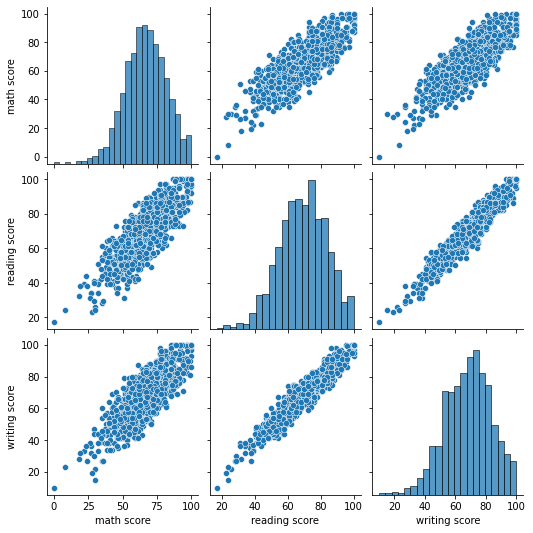

In [10]:
# one chart using matplotlib or seaborn (with title, axes labeled and anything else that would make it look professional)
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(grades_df)

In [11]:
grades_df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [12]:
# g_df['avg score'] = 
grades_df[['math score','reading score','writing score']].mean()

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

In [13]:
grades_df.sort_values(by=['gender', 'parental level of education'], ascending=False)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
61,male,group A,some high school,free/reduced,none,39,39,34
65,male,group B,some high school,standard,none,67,64,61
66,male,group D,some high school,free/reduced,none,45,37,37
73,male,group C,some high school,free/reduced,none,61,57,56
74,male,group C,some high school,standard,none,49,49,41
...,...,...,...,...,...,...,...,...
962,female,group E,associate's degree,standard,none,100,100,100
968,female,group E,associate's degree,standard,none,68,76,67
979,female,group C,associate's degree,standard,none,91,95,94
986,female,group C,associate's degree,standard,none,40,59,51


In [14]:
gender_mean = grades_df.groupby("gender")[["math score", "writing score", "reading score"]].mean()
gender_mean

,math score,writing score,reading score
gender,,,
female,63.633205,72.467181,72.608108
male,68.728216,63.311203,65.473029


Text(0, 0.5, 'Score Mean')

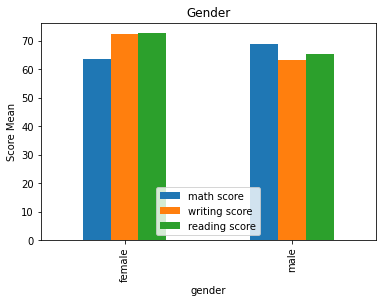

In [15]:
gender_mean.plot.bar()
plt.title("Gender")
plt.ylabel("Score Mean")

In [16]:
gendermap = {'female':1, 'male':0 }
gendermap

{'female': 1, 'male': 0}

In [17]:
grades_df['gender map'] = grades_df['gender'].apply(lambda s: gendermap.get(s) if s in gendermap else s)
grades_df['gender map']

0      1
1      1
2      1
3      0
4      0
      ..
995    1
996    0
997    1
998    1
999    1
Name: gender map, Length: 1000, dtype: int64

In [18]:
X = grades_df[["math score", "writing score", "reading score"]]
Y = grades_df['gender map']

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [20]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [21]:
logreg.fit(x_train, y_train)

LogisticRegression()

In [22]:
y_pred = logreg.predict(x_test)
y_pred

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

# Confusion Matrices

A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [23]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)

cnf_matrix

array([[108,  14],
       [ 15, 113]], dtype=int64)

Text(0.5, 257.44, 'Predicted Values')

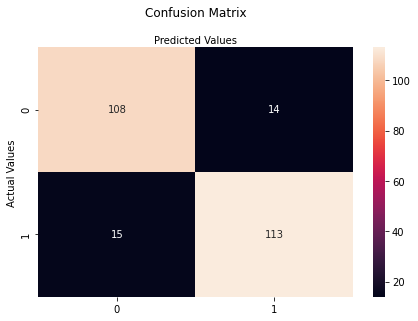

In [24]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

In [25]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[108,  14],
       [ 15, 113]], dtype=int64)

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       122
           1       0.89      0.88      0.89       128

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250



In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")

Accuracy: 0.884
Precision: 0.889763779527559
Recall: 0.8828125


# Exercise 3

Exercise 3 was a logistic regression on the Titanic dataset. It will be given as a guided project instead.